# Project: Analyzing TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this investigate a dataset project I will be analyzing TMDb movie data from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata). I will also take steps for this project - Data wrangling, cleaning, Posing quesitons, analysing and making conclusions. I'll explain more deail each step along with code cell.

**Research Question**
1. Which genre is most frequently showed?
2. Which genre is most popular in each year?
3. What is the most popular movie?
4. If it is popular then gets higher vote?
5. What movie got the highest vote?

Basic set up - Import analysis and visualization libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties
**Read csv file and check the info of the df so I can see how many columns and rows in each colunm**
- I see some missing value
- I can check the data type 

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Using df.head() to have more sense of the data**
- There are a lot of column that I don't need
- Some columns inclue multiple values so I might need to fix.    

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning 
- Based on data wranggling, I decided to remove some columns that I didn't need to use.
- I used the follow columns for investigating dataset.
- : id (For merging data), popularity, original_title, genres, vote_average and release_year

In [4]:
df.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
id                10843 non-null int64
popularity        10843 non-null float64
original_title    10843 non-null object
genres            10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 677.7+ KB


- I checked the info again and found the missing data in the genre column so I drop rows using *dropna()*.

In [6]:
df.dropna(inplace=True)

- The next step is to fix the genre column. We found it has multiple valuses seperated by '|'

In [7]:
list_of_genre = df['genres'].str.split('|').tolist()

- Then, I stacked genre using .stack(). I had to reset index that I used for stacking so I could get a nice data frame.

In [8]:
stacked_genre = pd.DataFrame(list_of_genre, index=df['id']).stack()

In [110]:
stacked_genre.head().reset_index()

,id,level_1,0
0,135397,0,Action
1,135397,1,Adventure
2,135397,2,Science Fiction
3,135397,3,Thriller
4,76341,0,Action


- Now I need to merge stacked data with the original data based on 'id' column. 
- After merging, I removed unnecessary columns - 'id' and 'genres'(original one). 
- I also, rename columname '0' to 'genre'(new one) to clearify. 

In [10]:
merged_df = df.merge(stacked_genre.to_frame(), on='id', right_index=True)

In [11]:
merged_df.rename(index=str, columns={0: "genre"}, inplace=True)
merged_df.drop(['id', 'genres'], axis=1, inplace=True)

In [12]:
merged_df.head()

,popularity,original_title,vote_count,vote_average,release_year,genre
0,32.985763,Jurassic World,5562,6.5,2015,Action
0,32.985763,Jurassic World,5562,6.5,2015,Adventure
0,32.985763,Jurassic World,5562,6.5,2015,Science Fiction
0,32.985763,Jurassic World,5562,6.5,2015,Thriller
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,Action


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genre is most frequently showed?

- To figure the genre that is the most popular, I made quick computed result.
- Based on this, Drama is most frequently showed and Comedy is followed by it.

In [64]:
merged_df['genre'].value_counts().head()

Drama       4763
Comedy      3793
Thriller    2910
Action      2387
Romance     1712
Name: genre, dtype: int64

- But I want to see the visualization for above result, 
- I made a bar chart using Seaborn.
- Drama has a definitely huge portions. 

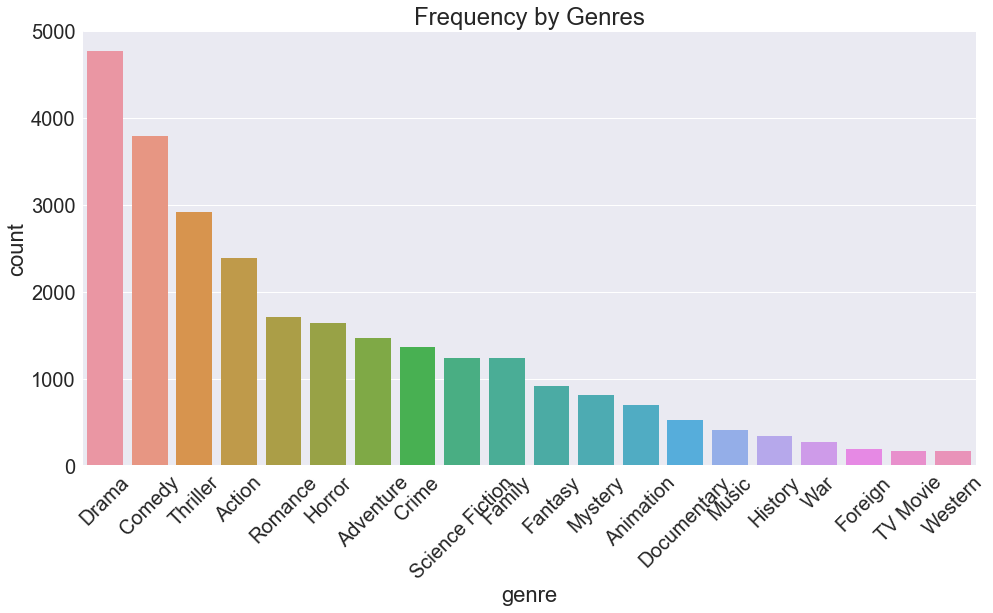

In [116]:
plt.figure(figsize=(16,8))
sns.countplot(x='genre', data=merged_df, order = merged_df['genre'].value_counts().index)
plt.title('Frequency by Genres')
plt.xticks(rotation=45)
plt.show()

### Research Question 2 : Which genre is most popular in each year?

- Following hit map shows that which genre is more popular in specific year
- As we found above, Drama has a lot of counted value but it doesn't mean that it is the most popular genre. 
- In 60s Animation was popular and more recent time, Action, Crime, Fantasy, SF genres are more popular.

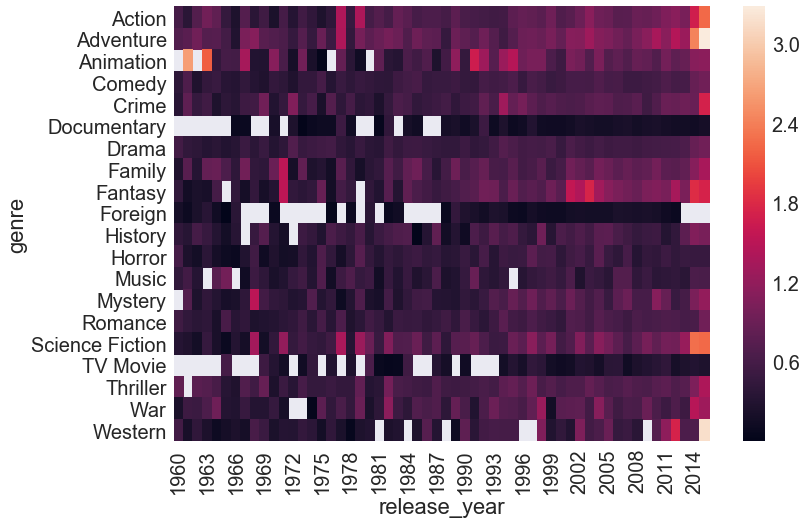

In [129]:
h = merged_df.pivot_table(index='genre', columns='release_year',values='popularity')
plt.figure(figsize=(12,8))
sns.heatmap(h)

### Research Question 3 : What is the most popular movie?

- I computed the most popular movie based on popurity
- It was Jurassic World and its genre is Action|Adventure|SF|Thriller. 

In [120]:
merged_df[merged_df['popularity'] == merged_df['popularity'].max()]

,popularity,original_title,vote_count,vote_average,release_year,genre
0,32.985763,Jurassic World,5562,6.5,2015,Action
0,32.985763,Jurassic World,5562,6.5,2015,Adventure
0,32.985763,Jurassic World,5562,6.5,2015,Science Fiction
0,32.985763,Jurassic World,5562,6.5,2015,Thriller


- Now I'm curious about those genres' and want to see more closely for year by year flows. 
- There are ups and downs but, time goes by, their popularity is getting higher.

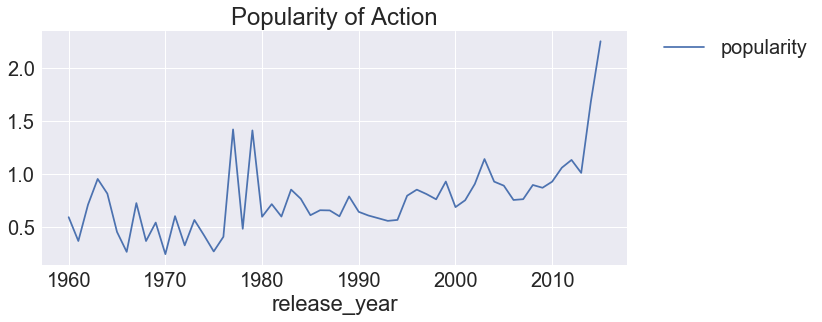

In [122]:
merged_df[merged_df['genre'] == 'Action'].groupby('release_year')['popularity'].mean().plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Popularity of Action')
plt.tight_layout()

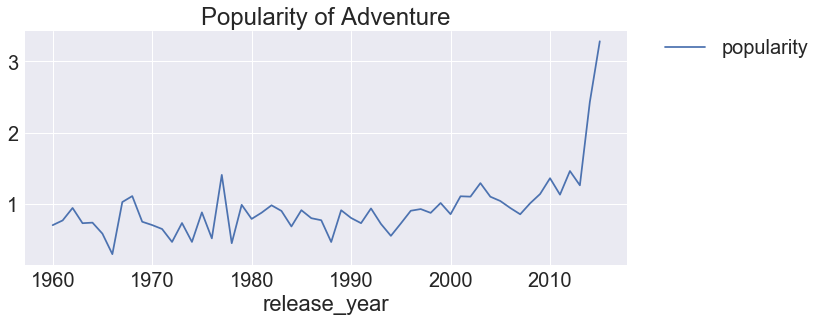

In [123]:
merged_df[merged_df['genre'] == 'Adventure'].groupby('release_year')['popularity'].mean().plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Popularity of Adventure')
plt.tight_layout()

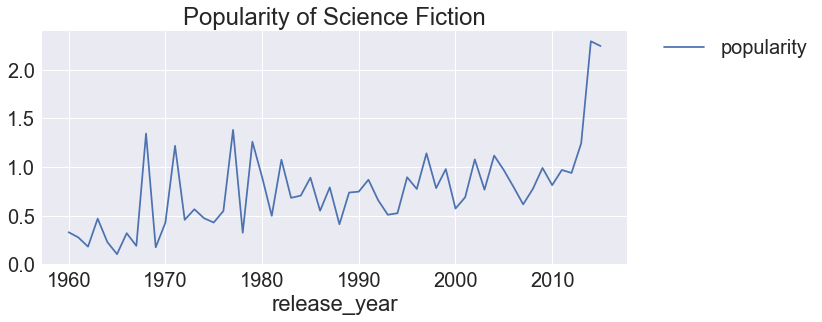

In [128]:
merged_df[merged_df['genre'] == 'Science Fiction'].groupby('release_year')['popularity'].mean().plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Popularity of Science Fiction')
plt.tight_layout()

### Research Question 4 : If it is popular then gets higher vote?

- First of all, I got a counted vote average[1 to 10]
- People usaully vote 6!

Text(0.5,1,'Vote average')

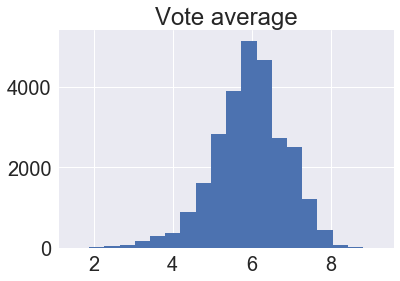

In [100]:
merged_df['vote_average'].hist(bins=20)
plt.title('Vote average')

- Now I used a join plot to see the relationship between poplarity and vote average.
- We can see if it's more popular and likely to get higher vote. 

C:\Users\Jinny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jinny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


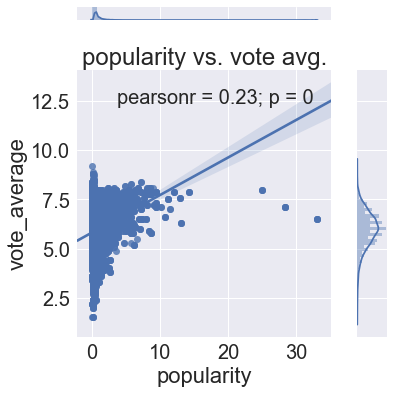

In [102]:
sns.jointplot(x='popularity',y='vote_average',data=merged_df, kind='reg')
plt.title('popularity vs. vote avg.')
plt.tight_layout()

### Research Question 5 : What movie got the highest vote?
- It was The Mask You Live in and vote average was 8.9 even though it's popularity was low. 

In [99]:
merged_df[merged_df['vote_average'] > 8.5]

,popularity,original_title,vote_count,vote_average,release_year,genre
538,0.114264,The Mask You Live In,11,8.9,2015,Documentary
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Drama
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Horror
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Mystery
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Science Fiction
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Thriller
2269,0.222293,Life Cycles,27,8.8,2010,Documentary
2401,0.067753,Opeth: In Live Concert At The Royal Albert Hall,10,8.6,2010,Music
3894,0.006925,The Story of Film: An Odyssey,14,9.2,2011,Documentary
6911,0.212010,Pink Floyd: Pulse,23,8.7,2006,Music


<a id='conclusions'></a>
## Conclusions